In [1]:
import numpy as np
from numpy import random as rd
import time
from solvers_listos import *
from funciones import *
import seaborn as sns

In [2]:
%run politica_R.ipynb
%run politica_P.ipynb
# hay que ver qué onda este print

{0: 0, 1: 91, 2: 27, 3: 11, 4: 63, 5: 69, 6: 67, 7: 91, 8: 46, 9: 73, 10: 66}


Inicial LS: ['N_0', 'N_2', 'N_0'], costo SO = 6115913.668682318
Final LS: {0: ['N_0', 'N_2', 'N_0'], 1: ['N_0', 'N_8', 'N_4', 'N_5', 'N_6', 'N_0'], 2: ['N_0', 'N_2', 'N_1', 'N_7', 'N_8', 'N_0'], 3: ['N_0', 'N_1', 'N_9', 'N_10', 'N_3', 'N_6', 'N_5', 'N_0'], 4: ['N_0', 'N_1', 'N_2', 'N_0']}, costo SO = 6115913.668682318
Tiempo: 0 | Ruta: ['N_0', 'N_2', 'N_0'] | costo_SO: 159.66304740858226 | costo_r: 234.54637068179076


Inicial LS: ['N_0', 'N_4', 'N_10', 'N_9', 'N_1', 'N_3', 'N_7', 'N_6', 'N_0'], costo SO = 256782.25362288277
Final LS: {0: ['N_0', 'N_1', 'N_4', 'N_9', 'N_10', 'N_7', 'N_0'], 1: ['N_0', 'N_5', 'N_1', 'N_5', 'N_2', 'N_0'], 2: ['N_0', 'N_8', 'N_4', 'N_10', 'N_4', 'N_5', 'N_9', 'N_1', 'N_7', 'N_6', 'N_0'], 3: ['N_0', 'N_2', 'N_0'], 4: ['N_0', 'N_10', 'N_9', 'N_10', 'N_4', 'N_1', 'N_7', 'N_6', 'N_8', 'N_5', 'N_7', 'N_0']}, costo SO = 256782.25362288277
Tiempo: 1 | Ruta: ['N_0', 'N_1', 'N_4', 'N_9'

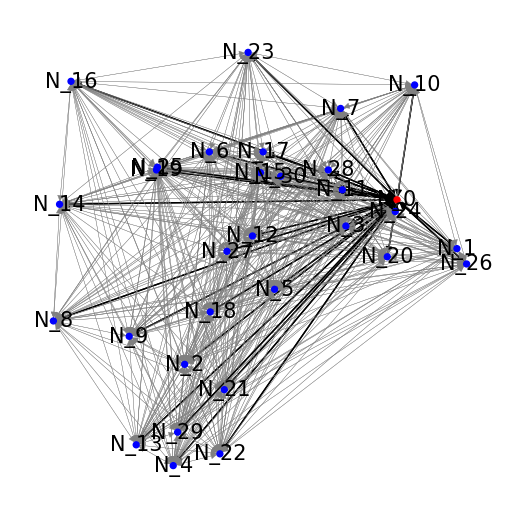

In [3]:
np.random.seed(0)
G, ubis, cap_tpte, info_locales = crear_grafo_inicial(archivo= 'n30full.xlsx' ,plot=True)
historia = simular_demanda_previa(G, dist = 'n', T=1000) 

In [4]:
rutas_R, perdidas_R, inventarios_R, costos_R, dems_R = simular_ejecucion_R(grafo_inicial = G, dem_historico = historia, capacidad = cap_tpte, T = 360)

Inventario inicial: 
N_0 3773
N_1 80
N_2 48
N_3 180
N_4 154
N_5 186
N_6 123
N_7 192
N_8 112
N_9 32
N_10 72
N_11 88
N_12 294
N_13 129
N_14 126
N_15 105
N_16 110
N_17 237
N_18 246
N_19 92
N_20 72
N_21 147
N_22 54
N_23 96
N_24 128
N_25 96
N_26 84
N_27 28
N_28 74
N_29 196
N_30 192


No hay locales que visitar
Tiempo: 0 | Ruta: [] | costo_SO: 0 | costo_r: 0
No hay locales que visitar
Tiempo: 1 | Ruta: [] | costo_SO: 0 | costo_r: 0
Tiempo: 2 | Ruta: ['N_0', 'N_24', 'N_10', 'N_7', 'N_15', 'N_23', 'N_16', 'N_19', 'N_8', 'N_2', 'N_27', 'N_12', 'N_3', 'N_20', 'N_26', 'N_0'] | costo_SO: 98.36704820933289 | costo_r: 1722.4892300527206
Tiempo: 3 | Ruta: ['N_0', 'N_11', 'N_28', 'N_30', 'N_17', 'N_6', 'N_25', 'N_14', 'N_9', 'N_13', 'N_4', 'N_29', 'N_22', 'N_21', 'N_18', 'N_5', 'N_1', 'N_0'] | costo_SO: 0 | costo_r: 1378.5923030176484
Tiempo: 4 | Ruta: ['N_0', 'N_26', 'N_24', 'N_7', 'N_2', 'N_0'] | costo_SO: 79.97857013265036 | costo_r: 971.4050841814422
Tiempo: 5 | Ruta: ['N_0', 'N_20', 'N_18', 'N_27

In [5]:
rutas_P, perdidas_P, inventarios_P, costos_P, dems_P = simular_ejecucion_P_LS(grafo_inicial = G, dem_historico= historia, T = 360, F = 15, cap = 871)



Inicial LS: [], costo SO = 9471138.765374288
Final LS: {0: [], 1: [], 2: ['N_0', 'N_24', 'N_20', 'N_12', 'N_11', 'N_28', 'N_7', 'N_10', 'N_1', 'N_3', 'N_27', 'N_18', 'N_21', 'N_22', 'N_4', 'N_25', 'N_6', 'N_16', 'N_0'], 3: ['N_0', 'N_26', 'N_5', 'N_30', 'N_15', 'N_17', 'N_23', 'N_19', 'N_14', 'N_8', 'N_9', 'N_2', 'N_29', 'N_13', 'N_0'], 4: ['N_0', 'N_24', 'N_20', 'N_12', 'N_11', 'N_28', 'N_7', 'N_10', 'N_1', 'N_3', 'N_16', 'N_18', 'N_21', 'N_22', 'N_4', 'N_25', 'N_6', 'N_27', 'N_0'], 5: ['N_0', 'N_0'], 6: ['N_0', 'N_24', 'N_20', 'N_3', 'N_11', 'N_28', 'N_30', 'N_15', 'N_17', 'N_6', 'N_25', 'N_19', 'N_14', 'N_8', 'N_9', 'N_2', 'N_21', 'N_29', 'N_4', 'N_13', 'N_22', 'N_18', 'N_27', 'N_12', 'N_5', 'N_1', 'N_13', 'N_26', 'N_10', 'N_7', 'N_23', 'N_16', 'N_0'], 7: ['N_0', 'N_0'], 8: ['N_0', 'N_24', 'N_20', 'N_3', 'N_11', 'N_28', 'N_25', 'N_10', 'N_1', 'N_12', 'N_27', 'N_18', 'N_21', 'N_22', 'N_4', 'N_7', 'N_6', 'N_16', 'N_0'], 9: ['N_0', 'N_26', 'N_5', 'N_30', 'N_15', 'N_17', 'N_23', 'N_19

In [24]:
insatisf_R = []
insatisf_P = []
print(len(costos_R[0]))
for dia in range(len(dems_P)):
    insatisf_R.append(costos_R[0][dia]/sum(dems_P[dia].values()))
    insatisf_P.append(costos_P[0][dia]/sum(dems_P[dia].values()))

len(insatisf_P)


360


360

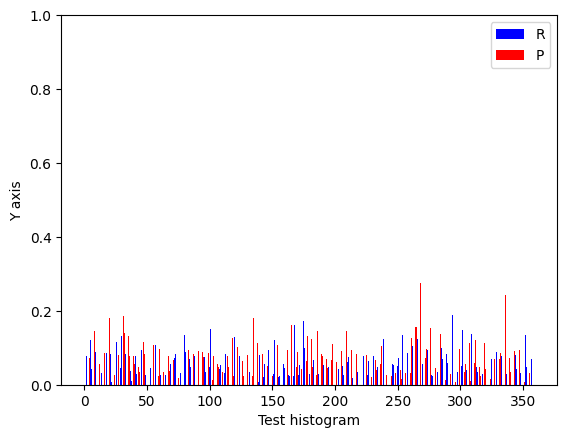

In [25]:
import numpy as np
import matplotlib.pyplot as plt

#The data

#Calculate optimal width
# width = np.min(np.diff(indices))/3
width = 1/3
x_R = [x-width for x in range(len(insatisf_R))]
fig = plt.figure()
ax = fig.add_subplot(111)
# matplotlib 3.0 you have to use align
# ax.bar(indices-width,womenMeans,width,color='b',label='-Ymin',align='edge')
# ax.bar(indices,menMeans,width,color='r',label='Ymax',align='edge')

ax.bar(x_R, insatisf_R, width, color = 'b', label = 'R', align='edge')
ax.bar(range(len(insatisf_P)), insatisf_P,width, color = 'r', label = 'P', align='edge')

ax.set_xlabel('Test histogram')
ax.set_ylabel('Y axis')
plt.ylim(0,1)
plt.legend()
plt.show()

(0.0, 2000.0)

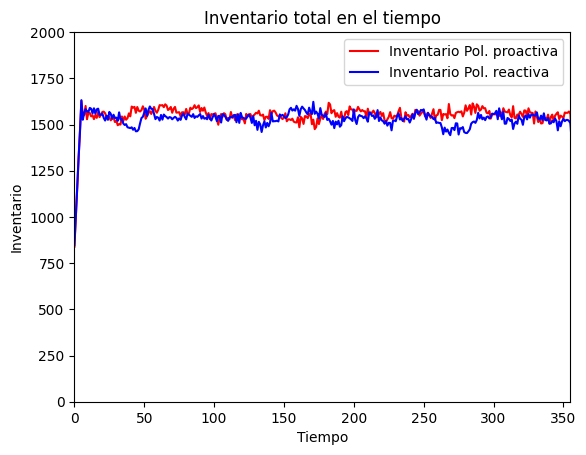

In [26]:
plt.plot(smooth(inventarios_R, 10), color = 'red', label = 'Inventario Reactiva')
plt.plot(smooth(inventarios_P, 10), color = 'blue', label = 'Inventario Proactiva')

plt.xlabel('Tiempo')
plt.ylabel('Inventario')
plt.title('Inventario total en el tiempo')
plt.legend(['Inventario Pol. proactiva', 'Inventario Pol. reactiva'])
plt.xlim(0,len(inventarios_P)-5)
plt.ylim(0000,2000)

In [27]:
# for i in range(60):
#     print(costos_R[0][i], costos_R[1][i])

costo_total_P = [costos_P[0][i] + costos_P[1][i] for i in range(len(costos_P[0]))]
costo_total_R = [costos_R[0][i] + costos_R[1][i] for i in range(len(costos_R[0]))]

(0.0, 2000.0)

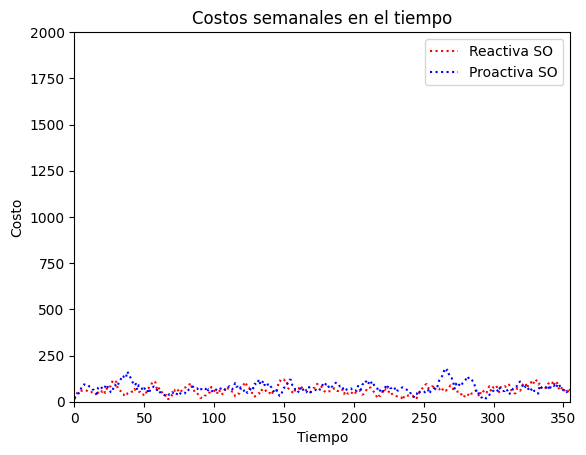

In [28]:
plt.plot(smooth(costos_R[0], 7), color = 'red', linestyle = 'dotted', label = 'Reactiva SO')
plt.plot(smooth(costos_P[0], 7), color = 'blue', linestyle = 'dotted', label = 'Proactiva SO')

plt.xlabel('Tiempo')
plt.ylabel('Costo')
plt.title('Costos semanales en el tiempo')
plt.legend()
plt.xlim(0,len(inventarios_P)-5)
plt.ylim(0,2000)

(0.0, 2000.0)

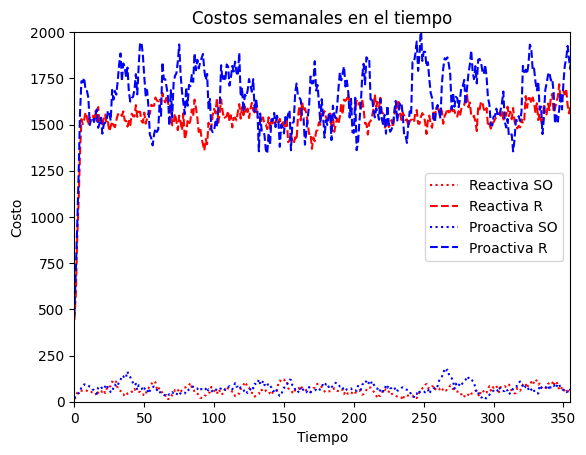

In [29]:
# plt.plot(smooth(inventarios_P, 7), color = 'red')
# plt.plot(smooth(inventarios_R, 7), color = 'blue')

plt.plot(smooth(costos_R[0], 7), color = 'red', linestyle = 'dotted', label = 'Reactiva SO')
plt.plot(smooth(costos_R[1], 7), color = 'red', linestyle = '--', label = 'Reactiva R')

# plt.plot(smooth(costos_R[0], 7), color = 'red', linestyle = 'dotted', label = 'Reactiva SO')
# plt.plot(smooth(costos_R[1], 7), color = 'red', linestyle = '--', label = 'Reactiva R')

plt.plot(smooth(costos_P[0], 7), color = 'blue', linestyle = 'dotted', label = 'Proactiva SO')
plt.plot(smooth(costos_P[1], 7), color = 'blue', linestyle = '--', label = 'Proactiva R')

plt.xlabel('Tiempo')
plt.ylabel('Costo')
plt.title('Costos semanales en el tiempo')
plt.legend()
plt.xlim(0,len(inventarios_P)-5)
plt.ylim(0,2000)

In [30]:
costo_total_P_inv = [costos_P[0][i]*3 + costos_P[1][i] + inventarios_P[i]*2 for i in range(len(costos_P[0]))]
costo_total_R_inv = [costos_R[0][i]*3 + costos_R[1][i] + inventarios_R[i]*2 for i in range(len(costos_R[0]))]

(0.0, 2500.0)

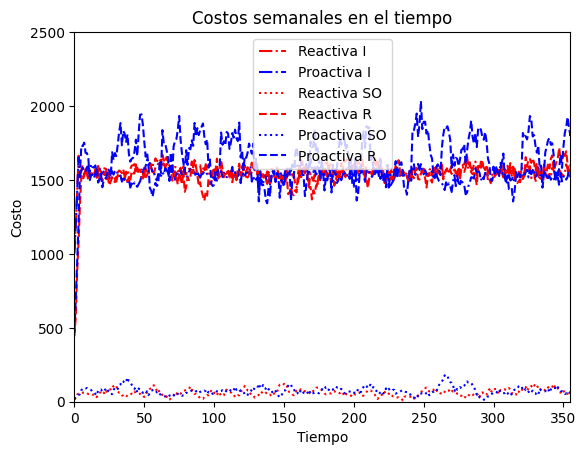

In [31]:
plt.plot(smooth(inventarios_R, 7), linestyle = 'dashdot', color = 'red', label = 'Reactiva I')
plt.plot(smooth(inventarios_P, 7), linestyle = 'dashdot', color = 'blue', label = 'Proactiva I')

plt.plot(smooth(costos_R[0], 7), color = 'red', linestyle = 'dotted', label = 'Reactiva SO')
plt.plot(smooth(costos_R[1], 7), color = 'red', linestyle = '--', label = 'Reactiva R')

# plt.plot(smooth(costos_R[0], 7), color = 'red', linestyle = 'dotted', label = 'Reactiva SO')
# plt.plot(smooth(costos_R[1], 7), color = 'red', linestyle = '--', label = 'Reactiva R')

plt.plot(smooth(costos_P[0], 7), color = 'blue', linestyle = 'dotted', label = 'Proactiva SO')
plt.plot(smooth(costos_P[1], 7), color = 'blue', linestyle = '--', label = 'Proactiva R')

plt.xlabel('Tiempo')
plt.ylabel('Costo')
plt.title('Costos semanales en el tiempo')
plt.legend()
plt.xlim(0,len(inventarios_P)-5)
plt.ylim(0,2500)

(0.0, 355.0)

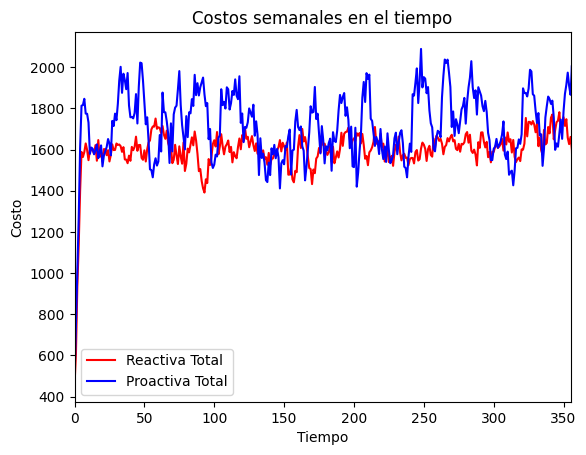

In [32]:
plt.plot(smooth(costo_total_R, 7), color = 'red', label = 'Reactiva Total')
plt.plot(smooth(costo_total_P, 7), color = 'blue', label = 'Proactiva Total')

plt.xlabel('Tiempo')
plt.ylabel('Costo')
plt.title('Costos semanales en el tiempo')
plt.legend()
plt.xlim(0,len(inventarios_P)-5)
# plt.ylim(0,2000)

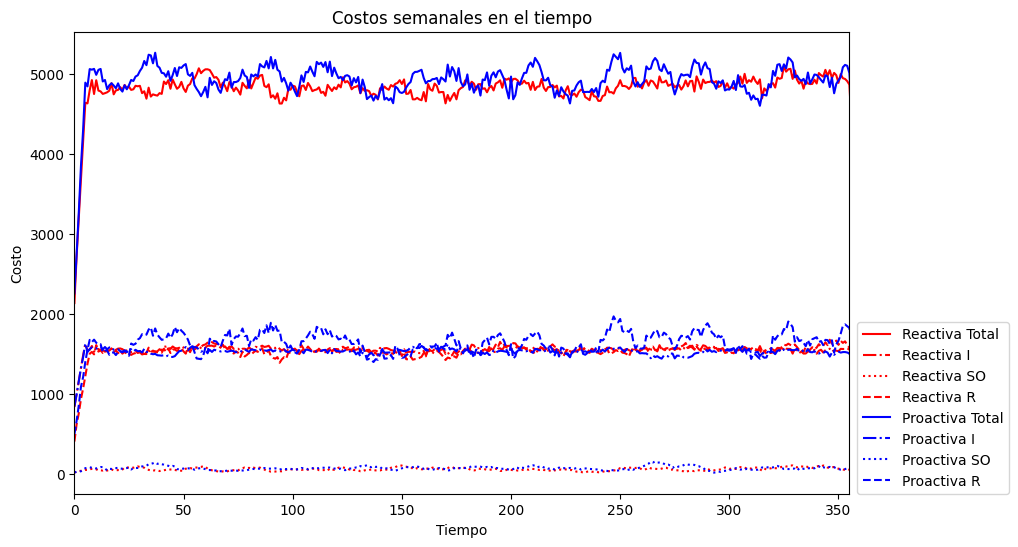

In [33]:

plt.figure(figsize=(10,6))

plt.plot(smooth(costo_total_R_inv, 10), color = 'red', label = 'Reactiva Total')
plt.plot(smooth(inventarios_R, 10), linestyle = 'dashdot', color = 'red', label = 'Reactiva I')
plt.plot(smooth(costos_R[0], 10), color = 'red', linestyle = 'dotted', label = 'Reactiva SO') 
plt.plot(smooth(costos_R[1], 10), color = 'red', linestyle = '--', label = 'Reactiva R')

plt.plot(smooth(costo_total_P_inv, 10), color = 'blue', label = 'Proactiva Total')
plt.plot(smooth(inventarios_P, 10), linestyle = 'dashdot', color = 'blue', label = 'Proactiva I')
plt.plot(smooth(costos_P[0], 10), color = 'blue', linestyle = 'dotted', label = 'Proactiva SO')
plt.plot(smooth(costos_P[1], 10), color = 'blue', linestyle = '--', label = 'Proactiva R')


plt.xlabel('Tiempo')
plt.ylabel('Costo')
plt.title('Costos semanales en el tiempo')
# plt.legend()
plt.xlim(0,len(inventarios_P)-5)
# plt.ylim(0,6000)

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
#           fancybox=True, shadow=True, ncol=5)
l2 = plt.legend(bbox_to_anchor=(1.01, 0), loc="lower left", borderaxespad=0)
plt.show()

[0.5537773330963586, 0.06665945162147822, 1.1215885661918208] [0.5910502141396925, 0.08039108050616858, 1.1049794000987578]


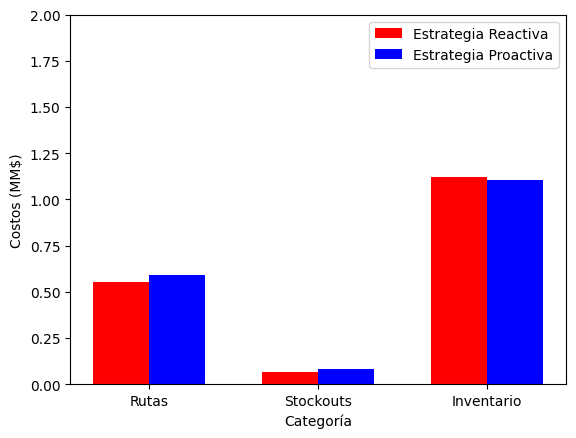

In [34]:
# plt.plot(smooth(costo_total_R_inv, 10), color = 'red', label = 'Reactiva Total')
# plt.plot(smooth(inventarios_R, 10), linestyle = 'dashdot', color = 'red', label = 'Reactiva I')
# plt.plot(smooth(costos_R[0], 10), color = 'red', linestyle = 'dotted', label = 'Reactiva SO') 
# plt.plot(smooth(costos_R[1], 10), color = 'red', linestyle = '--', label = 'Reactiva R')

costo_rutas_R = np.sum(costos_R[1])/1000000
costo_SO_R = np.sum(costos_R[0])*3/1000000
costo_inv_R = np.sum(inventarios_R)*2/1000000
CR = [costo_rutas_R, costo_SO_R, costo_inv_R]

costo_rutas_P = np.sum(costos_P[1])/1000000
costo_SO_P = np.sum(costos_P[0])*3/1000000
costo_inv_P = np.sum(inventarios_P)*2/1000000
CP = [costo_rutas_P, costo_SO_P, costo_inv_P]
#The data
print(CR, CP)
#Calculate optimal width
# width = np.min(np.diff(indices))/3
width = 1/3
x_R = [x-width for x in range(3)]
fig = plt.figure()
ax = fig.add_subplot(111)

# matplotlib 3.0 you have to use align
# ax.bar(indices-width,womenMeans,width,color='b',label='-Ymin',align='edge')
# ax.bar(indices,menMeans,width,color='r',label='Ymax',align='edge')

ax.bar(x_R, CR, width, color = 'r', label = 'Estrategia Reactiva', align='edge')
ax.bar(range(3), CP, width, color = 'b', label = 'Estrategia Proactiva', align='edge')
plt.xticks([0, 1, 2],['Rutas', 'Stockouts', 'Inventario'])
plt.xlabel('Categoría')
plt.ylabel('Costos (MM\$)')
plt.legend()
plt.ylim(0,2)
plt.show()

[80391.08050616858, 591050.2141396925, 1104979.4000987578]


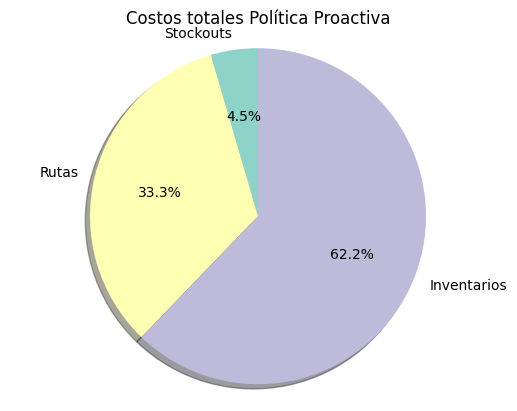

In [35]:
# costo_total_R_inv = [costos_R[0][i]*3 + costos_R[1][i] + inventarios_R[i]*2 for i in range(len(costos_R[0]))]

labels = 'Stockouts', 'Rutas', 'Inventarios'
sizes = [np.sum(costos_P[0])*3, np.sum(costos_P[1]), np.sum(inventarios_P)*2]
explode = (0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
print(sizes)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, 
        explode=explode,
        labels=labels, 
        autopct='%1.1f%%',
        shadow=True, 
        startangle=90,
        colors=sns.color_palette('Set3')
        )
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Costos totales Política Proactiva')
plt.show()

In [36]:
CR_R = []
for cr in costos_R[1]:
    if cr == np.inf:
        CR_R.append(0)
    else:
        CR_R.append(cr)

[66659.45162147822, 553777.3330963586, 1121588.566191821]


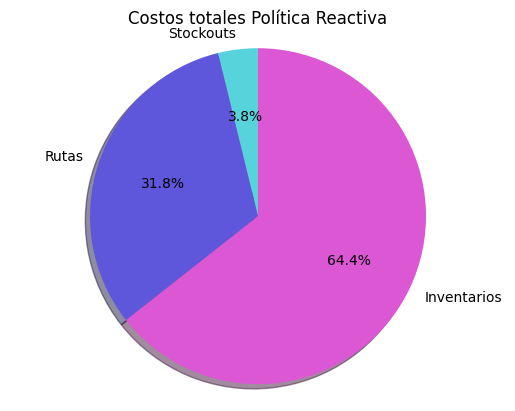

In [37]:
labels = 'Stockouts', 'Rutas', 'Inventarios'
sizes = [np.sum(costos_R[0])*3, np.sum(CR_R), np.sum(inventarios_R)*2]
explode = (0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
print(sizes)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, 
        explode=explode,
        labels=labels, 
        autopct='%1.1f%%',
        shadow=True, 
        startangle=90,
        colors=sns.color_palette('hls')[3:]
        )
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Costos totales Política Reactiva')
plt.show()

In [38]:
#cantidad_06 = len(df_nodos[df_nodos['frec'] >= 0.5])
#cantidad_04 = len(df_nodos[df_nodos['frec'] < 0.5])

#print (f'Locales visitados más de 50% de los días: {cantidad_06}, que corresponde a un {cantidad_06/N*100}%')
#print (f'Locales visitados menos de 50% de los días: {cantidad_04}, que corresponde a un {cantidad_04/N*100}%')

In [39]:
#datos = dispersion_intervalos(df)
        
#df_nodos['mean'] = datos['mean']
#df_nodos['std'] = datos['std']
#df_nodos['porcentaje demanda'] = df_nodos['dem_mean'] / df_nodos['Up']
#df_nodos['porcentaje dem. inicial'] = df_nodos['Prod'] / df_nodos['Up']
#df_nodos_corr = df_nodos[['Inv','Up','Low','Prod','h','frec','mean','std','dem_mean','porcentaje demanda','porcentaje dem. inicial']]
#df_nodos

In [40]:
#df_nodos_corr.corr()

In [41]:
n_s = [10,20,30]
inicial = ['empty', 'estandar', 'full']
datos_R = {}
for n in n_s:
    for i in inicial:
        file_name = f'n{n}{i}.xlsx'
        output = f'plots//tablero_n{n}_{i}.png'
        G, ubis, cap_tpte, info_locales = crear_grafo_inicial(archivo= file_name ,plot=False)
        historia = simular_demanda_previa(G, dist = 'n', T=1000)
        rutas_R, perdidas_R, inventarios_R = simular_ejecucion_R(grafo_inicial = G, T = 365, dem_historico = historia, capacidad = cap_tpte)
        datos_R[f'n{n}{i}'] = {'rutas': rutas_R, 'perdidas': perdidas_R, 'inventarios': inventarios_R}
        N = len(G.nodes())-1
        df = generar_df(rutas_R, N)
        plotear_tablero_visitas(df, guardar = True, nombre = output)
        print (f'Listo {file_name}')



        

Inventario inicial: 
N_0 1428
N_1 0
N_2 0
N_3 0
N_4 0
N_5 0
N_6 0
N_7 0
N_8 0
N_9 0
N_10 0


Tiempo: 0 | Ruta: ['N_0', 'N_4', 'N_10', 'N_9', 'N_2', 'N_1', 'N_3', 'N_7', 'N_6', 'N_8', 'N_5', 'N_0'] | costo_SO: 0 | costo_r: 1402.2576333062188
Tiempo: 1 | Ruta: ['N_0', 'N_4', 'N_1', 'N_0'] | costo_SO: 32.279107927763704 | costo_r: 668.4466684182628
Tiempo: 2 | Ruta: ['N_0', 'N_9', 'N_2', 'N_6', 'N_0'] | costo_SO: 397.2776984777936 | costo_r: 881.8242116830281
Tiempo: 3 | Ruta: ['N_0', 'N_4', 'N_10', 'N_9', 'N_2', 'N_1', 'N_3', 'N_7', 'N_6', 'N_8', 'N_5', 'N_0'] | costo_SO: 0 | costo_r: 1402.2576333062188
Tiempo: 4 | Ruta: ['N_0', 'N_0'] | costo_SO: 170.6029451741735 | costo_r: inf
Tiempo: 5 | Ruta: ['N_0', 'N_4', 'N_9', 'N_2', 'N_1', 'N_3', 'N_7', 'N_6', 'N_5', 'N_0'] | costo_SO: 0 | costo_r: 1243.6909914125158


Tiempo: 6 | Ruta: ['N_0', 'N_4', 'N_10', 'N_8', 'N_0'] | costo_SO: 73.94026114245175 | costo_r: 924.5648220592918
Tiempo: 7 | Ruta: ['N_0', 'N_4', 'N_9', 'N_2', 'N_1', 'N_3', 'N_6', 'N_0'] | costo_SO: 72.5659749348656 | costo_r: 1017.1854637372273
Tiempo: 8 | Ruta: ['N_0', 'N_10', 'N_1', 'N_7', 'N_8', 'N_5', 'N_0'] | costo_SO: 146.6034188206088 | costo_r: 1158.3798285915937
Tiempo: 9 | Ruta: ['N_0', 'N_4', 'N_9', 'N_2', 'N_1', 'N_6', 'N_0'] | costo_SO: 0 | costo_r: 983.6305219771198
Tiempo: 10 | Ruta: ['N_0', 'N_4', 'N_10', 'N_9', 'N_1', 'N_3', 'N_7', 'N_8', 'N_5', 'N_0'] | costo_SO: 85.49396154491754 | costo_r: 1377.0574164973032
Tiempo: 11 | Ruta: ['N_0', 'N_9', 'N_2', 'N_6', 'N_0'] | costo_SO: 0 | costo_r: 881.8242116830281
Tiempo: 12 | Ruta: ['N_0', 'N_4', 'N_5', 'N_6', 'N_7', 'N_1', 'N_2', 'N_0'] | costo_SO: 0 | costo_r: 1130.0448212882843
Tiempo: 13 | Ruta: ['N_0', 'N_10', 'N_9', 'N_1', 'N_3', 'N_8', 'N_0'] | costo_SO: 86.27572324512875 | costo_r: 1177.210062433239
Tiempo: 14 | R

ValueError: too many values to unpack (expected 3)

In [ ]:
datos_R

In [ ]:
datos_P = {}
for n in n_s:
    for i in inicial:
        file_name = f'n{n}{i}.xlsx'
        output = f'plots//tablero_PRO_n{n}_{i}.png'
        G, ubis, cap_tpte, info_locales = crear_grafo_inicial(archivo= file_name ,plot=False)
        historia = simular_demanda_previa(G, dist = 'n', T=1000)
        rutas_P, perdidas_P, inventarios_P = simular_ejecucion_P_LS(grafo_inicial = G, dem_historico= historia, T = 365, F = 5, cap = cap_tpte)
        datos_P[f'n{n}{i}'] = {'rutas': rutas_P, 'perdidas': perdidas_P, 'inventarios': inventarios_P}
        N = len(G.nodes())-1
        df = generar_df(rutas_P, N)
        plotear_tablero_visitas(df, guardar = True, nombre = output)
        print (f'Listo {file_name}')


In [ ]:
list(datos_P.keys())

In [ ]:
inventarios_P = {k: datos_P[k]['inventarios'] for k in list(datos_P.keys())}
inventarios_R = {k: datos_R[k]['inventarios'] for k in list(datos_R.keys())}

In [ ]:
perdidas_P['n10estandar']

[251.39213716977955,
 426.98936633456054,
 371.1409165104095,
 59.99009813037484,
 199.19684908087729,
 169.73919203511593,
 166.64971008550242,
 141.85371582743468,
 150.37688260137665,
 314.6210477367861,
 341.58569635797807,
 29.685929776866416,
 261.9801996392337,
 244.61174592022468,
 147.34208694121492,
 156.05449470499198,
 133.22886340642893,
 443.0823880236601,
 269.0321030994802,
 174.2866600814391,
 262.62835472441844,
 153.12814988220134,
 80.26350719160513,
 146.0580699990398,
 191.95305400865223,
 164.7807157982468,
 134.95758437287455,
 175.5910986683432,
 165.40886086184412,
 39.74161786631333,
 34.78702349958965,
 94.20899975113123,
 196.61859573212087,
 223.334846342667,
 144.80329753368576,
 299.39829702479847,
 488.0139484428421,
 227.72540473141194,
 192.37211327359168,
 178.54543972560953,
 259.36562296558947,
 0,
 95.66943728351367,
 350.51396933629474,
 151.23146975696523,
 98.32924149745023,
 359.8616082072124,
 47.551489419121246,
 119.58640095396336,
 299.622

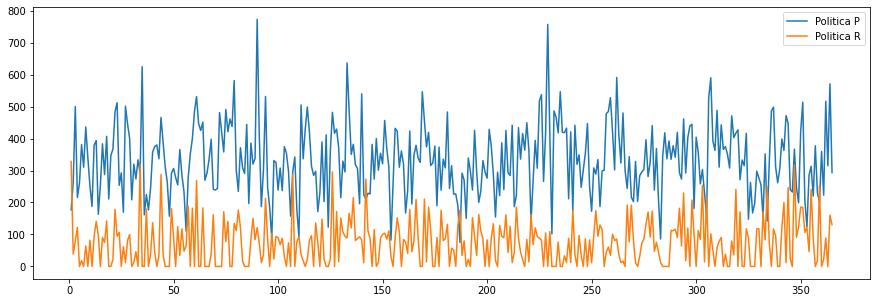

In [38]:


# generamos un dataframe para luego plotear
perdidas_P_1 = np.array(perdidas_P['n20estandar'])
dias = np.arange(1,366)
perdidas_R_1 = np.array(perdidas_R['n20estandar'])
# ahora graficamos
plt.figure(figsize=(15,5))
plt.plot(dias, perdidas_P_1, label = 'Politica P')

plt.plot(dias, perdidas_R_1, label = 'Politica R')

plt.legend()

plt.show()
